E6.project_Lyrics_Maker
===
---

주어진 단어들을 토대로 다음 단어를 추천해주는 lyrics_maker모델을 만들어보자. 

![Best-Lyrics-Video-Maker-App-For-Android-2020](https://user-images.githubusercontent.com/70703320/105852424-cdf04a00-6027-11eb-85dc-a602c6136392.png)
사진출처 : (https://funoovr.com/best-lyrics-video-maker-app-for-android-2020/)



## 1. 데이터 읽어오기
#### 필요한 라이브러리 불러오기

In [1]:
import glob  # 파일들의 리스트를 뽑을 때 사용하는 라이브러리
import os  # path를 불러들일 때 쓰는 라이브러리
import pandas as pd  # 데이터 시각화를 위해 쓰는 라이브러리

#### 파일 작업을 해주기 경로 설정

In [2]:
txt_file_path = os.getenv('HOME')+'/aiffel/lyricist/data/lyrics/*'  # lyrics 폴더 안에 모든 파일들을 지정

txt_list = glob.glob(txt_file_path)  # 파일 경로에 텍스트 파일들을 리스트로 설정

#### 본격적인 파일 읽어서 리스트 만들기 작업

In [3]:
raw_corpus_1 = []  # 빈 raw_corpus_1 리스트 생성

for txt_file in txt_list:  # txt_list에서  txt_file 하나씩 불러들임
    with open(txt_file, "r") as f:  # with as 구문을 통해 파일을 읽기모드로 읽어 f로 저장 후 나감
        raw = f.read().splitlines()  # 파일을 한줄씩 읽어서 raw로 저장함
        raw_corpus_1.extend(raw)  # extend 함수를 이용하여 각각의 항목들을 raw_corpus_1에 추가해나감

print("데이터 크기:", len(raw_corpus_1))  # 데이터 크기를 출력

데이터 크기: 187088


#### 리스트 문장들 출력해보기

In [4]:
data = pd.DataFrame({'Lyrics' : raw_corpus_1[:10], # 출력할 문장들을 table로 보기 위해 dictionary를 만듦
                    'Num' : [n for n in range(1,11)]})  
data.set_index('Num', inplace = True)  # 인덱스를 Num으로 설정
data  # pandas를 이용해 문장 출력

,Lyrics
Num,
1,
2,
3,Jesus died for somebody's sins but not mine
4,Meltin' in a pot of thieves
5,Wild card up my sleeve
6,Thick heart of stone
7,My sins my own
8,"They belong to me, me"
9,


공백인 문장을 지워주어야 한다!


## 2. 정규표현식으로 지워주기

#### preprocess_sentence 함수 만들어주기 (정규표현식을 이용한 문장 전처리)

In [5]:
import re  # 정규표현식을 위한 라이브러리

def preprocess_sentence(sentence):  # preprocess_sentence 함수 만들기, 매개변수: sentence
    sentence = sentence.lower().strip()  # 소문자로 바꾸기, 양쪽 공백 지우기       
  
    
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)  # 패턴의 특수문자를 만나면 특수문자 양       
    sentence = re.sub(r'[" "]+', " ", sentence)  # 공백 패턴을 만나면 스페이스 1개로 치환                 
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence)  # a-zA-Z?.!,¿ 패턴을 제외한 모든 문자를 스페이스 1개로 치환

    sentence = sentence.strip()  # 양쪽 공백 지우기

    sentence = '<start> ' + sentence + ' <end>'  # 문장 앞에 <start> 를 문장 뒤에  <end>를 붙여줌     

    
    return sentence  # 매개변수를 return

print(preprocess_sentence("This @_is ;;;sample        sentence."))  #함수 확인을 위해 예시문장 출력  

<start> this is sample sentence . <end>


원하였던 모양으로 출력하였다.

#### 만들어준 함수 적용해주되 빈 원소는 빼주기

In [6]:
corpus = []  # 빈 corpus 리스트 만들기

for sentence in raw_corpus_1:  # 앞서 만들었던 raw_corpus_1의 원소들을
    if len(sentence) == 0: continue  # 길이가 0이면 패쓰
    corpus.append(preprocess_sentence(sentence))  # 나머지는 만들어준 함수를 통해 문장 전처리
    
print("데이터 크기:", len(corpus))  # 데이터 크기 다시 확인

데이터 크기: 175986


#### 리스트 문장 출력해보기

In [7]:
data = pd.DataFrame({'Lyrics' :corpus[:10], # 출력할 문장들을 table로 보기 위해 dictionary를 만듦
                    'Num' : [n for n in range(1,11)]})  
data.set_index('Num', inplace = True)  # 인덱스를 Num으로 설정
data  # pandas를 이용해 문장 출력

,Lyrics
Num,
1,<start> jesus died for somebody s sins but not...
2,<start> meltin in a pot of thieves <end>
3,<start> wild card up my sleeve <end>
4,<start> thick heart of stone <end>
5,<start> my sins my own <end>
6,"<start> they belong to me , me <end>"
7,<start> people say beware ! <end>
8,<start> but i don t care <end>
9,<start> the words are just <end>


원하는 모양으로 잘 처리 되었다.

#### 문장의 길이 별 분포 시각화

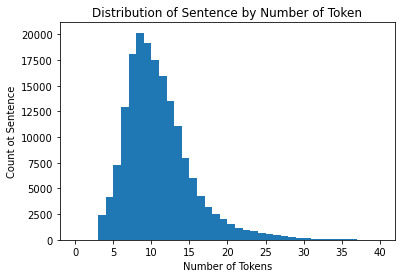

Counter({3: 2413,
         4: 4168,
         5: 7274,
         6: 12904,
         7: 18104,
         8: 20170,
         9: 19192,
         10: 17485,
         11: 15968,
         12: 13516,
         13: 11080,
         14: 7924,
         15: 6029,
         16: 4247,
         17: 3240,
         18: 2510,
         19: 2050,
         20: 1512,
         21: 1170,
         22: 989,
         23: 842,
         24: 702,
         25: 544,
         26: 435,
         27: 333,
         28: 244,
         29: 211,
         30: 156,
         31: 119,
         32: 87,
         33: 71,
         34: 31,
         35: 33,
         36: 32,
         37: 16,
         38: 19,
         39: 18,
         40: 9,
         41: 9,
         42: 11,
         43: 8,
         44: 8,
         45: 5,
         46: 5,
         47: 5,
         48: 8,
         49: 2,
         50: 2,
         51: 7,
         52: 2,
         53: 6,
         54: 5,
         55: 6,
         56: 1,
         57: 7,
         58: 1,
         60: 2,
 

In [8]:
import matplotlib.pyplot as plt  # 시각화하기 위한 라이브러리 
from collections import Counter  # 실제 개수를 확인하기 위한 라이브러리

token_len = []  # 빈 리스트 token_length 만들기

for sentence in corpus:  # corpus 안에 있는 문장들을 꺼내서
    token_len.append(len(sentence.split(' ')))  # 띄어쓰기 별로 나누어 길이를 측정하고 리스트에 붙임

plt.hist(token_len, range = (0,40), bins = 40)  # 히스토그램 설정
plt.xlabel('Number of Tokens')  # x축 이름 설정
plt.ylabel('Count ot Sentence')  # y축 이름 설정
plt.title('Distribution of Sentence by Number of Token')  # 히스토그램 이름 설정
plt.show()  # 히스토그램 보기
Counter(sorted(token_len))  # 실제 개수 확인

정규분포보다는 왼쪽에 치우친 F-분포에 가까운 형태를 띠고 있음

## 3. 데이터 정제 토큰화

#### 토큰화 진행 중 16이상은 제거해주기 

In [9]:
import numpy as np  # 행렬연산을 위한 라이브러리           
import tensorflow as tf  # 텐서를 만들어주기 위한 라이브러리     

token_tray = []  # 빈 token_tray 리스트 만들기

def tokenize(corpus):  # tokenize 함수 정의, 매개변수 corpus
    
    tokenizer = tf.keras.preprocessing.text.Tokenizer(  # tesorflow에서 케라스 불러들이고 Tokenizer를 사용
        num_words=12000,  # 전체 단어의 개수를 12000으로!
        filters='',  # default     
        oov_token="<unk>"  # 사전에 없는 단어를 <unk>로 지정
    )
    tokenizer.fit_on_texts(corpus)  # corpus로부터 Tokenizer가 사전을 자동구축  
    
    tensor = tokenizer.texts_to_sequences(corpus)  # 사전으로부터 corpus를 해석해 tensor로 변환
    
    for str_len in tensor:  # tensor에서 원소들을 하나 꺼내어
        if len(str_len) < 16:  # 길이가 15이하이면 
            token_tray.append(str_len)  # token_tray 리스트에 넣어줌
        else:  # 아니면
            continue  # 패쓰!
    
    # maxlen = 15으로, post방식으로 padding 해줌
    tensor_post = tf.keras.preprocessing.sequence.pad_sequences(token_tray, maxlen=15, padding='post')
    
    # maxlen = 15으로, pre방식으로 padding 해줌
    tensor_pre = tf.keras.preprocessing.sequence.pad_sequences(token_tray, maxlen=15, padding='pre')

    print(tensor_post, tensor_pre, tokenizer)  # tensor_post, tensor_pre, tokenizer를 프린트
    return tensor_post, tensor_pre, tokenizer  # tensor_post, tensor_pre, tokenizer를 리턴

tensor_post, tensor_pre, tokenizer = tokenize(corpus)  # corpus에 대하여 토큰화!

[[   2  641  732 ...    0    0    0]
 [   2    1   14 ...    0    0    0]
 [   2  494 2043 ...    0    0    0]
 ...
 [   2   33   32 ...    0    0    0]
 [   2    5   34 ...    0    0    0]
 [   2   17   16 ...    0    0    0]] [[   0    0    0 ...   70  216    3]
 [   0    0    0 ...   19 2966    3]
 [   0    0    0 ...   13 2898    3]
 ...
 [   0    0    0 ... 2632  373    3]
 [   0    0    0 ...   27  351    3]
 [   0    0    0 ...  131  744    3]] <keras_preprocessing.text.Tokenizer object at 0x7fa653d03950>


## 4. 평가 데이터셋 분리

#### 만든 토크나이저 사전 확인해보기

In [10]:
token_dic = []  # 빈 token_dic 리스트 만들기

for idx in tokenizer.index_word:  # tokenizer.index_word안의 idx에 대해
    token_dic.append(tokenizer.index_word[idx])  # idx에 해당하는 token을 append함
    if idx >= 10: break  # 10이 넘어가면 break
        
data = pd.DataFrame({'token' : token_dic[:10], # 출력할 문장들을 table로 보기 위해 dictionary를 만듦
                    'Num' : [n for n in range(1,11)]})  
data.set_index('Num', inplace = True)  # 인덱스를 Num으로 설정
data  # pandas를 이용해 문장 출력

,token
Num,
1,<unk>
2,<start>
3,<end>
4,","
5,i
6,the
7,you
8,and
9,a


#### tensor_pre, tensor_post 각각에 대해  \<start\> , \<end\> 각각을 없애준 것 만들기 

In [11]:
src_input_post = tensor_post[:, :-1]  # tensor_post에서 <end> 없앤것 저장   
tgt_input_post = tensor_post[:, 1:]  # tensor_post에서 <start> 없앤것 저장 

src_input_pre = tensor_pre[:, :-1]  # tensor_pre에서 <end> 없앤것 저장
tgt_input_pre = tensor_pre[:, 1:]  # tensor_pre에서 <start> 없앤것 저장

#### 데이터 나눠주기

In [12]:
from sklearn.model_selection import train_test_split  # 데이터셋을 나누기 위한 라이브러리

# post 방법 나눠주기 (test_size = 0.2)
enc_post_train, enc_post_val, dec_post_train, dec_post_val = train_test_split(src_input_post, tgt_input_post,  
                                                                              test_size=0.2,
                                                                              shuffle=True)

print("Source post Train:", enc_post_train.shape)  # enc_post_train.shape 출력
print("Target post Train:", dec_post_train.shape)  # dec_post_train.shape 출력


# pre 방법 나눠주기 (test_size = 0.2)
enc_pre_train, enc_pre_val, dec_pre_train, dec_pre_val = train_test_split(src_input_pre, tgt_input_pre,
                                                                          test_size=0.2,
                                                                          shuffle=True)

print("Source pre Train:", enc_pre_train.shape)  # enc_post_train.shape 출력
print("Target pre Train:", dec_pre_train.shape)  # dec_post_train.shape 출력

Source post Train: (124981, 14)
Target post Train: (124981, 14)
Source pre Train: (124981, 14)
Target pre Train: (124981, 14)


개수가 알맞게 되었다.

## 5. 인공지능 만들기

#### batch 설정 및 dataset설계하기

tf.data.Dataset.from_tensor_slice 설명
![tensor2](https://user-images.githubusercontent.com/70703320/105997457-fb53fb00-60ee-11eb-8d3c-0a024148e1f6.png)
tf.data.Dataset.from_tensor_slice.batch 설명
![batch](https://user-images.githubusercontent.com/70703320/105997703-4241f080-60ef-11eb-9b41-2ab13ce57f51.png)

출처 : [tensorflow API](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

In [13]:
# post 모델
BUFFER_SIZE_post = len(enc_post_train)  # buffer size 조절
BATCH_SIZE_post = 256  # batch size 조절
steps_per_epoch_post = len(enc_post_train) // BATCH_SIZE_post  # epoch별 step 크기 조절

VOCAB_SIZE_post = tokenizer.num_words + 1  # 사전에 0 : <pad>를 붙여 12001개
# post의 train데이터를 dataset 으로 지정
dataset_post = tf.data.Dataset.from_tensor_slices((enc_post_train, dec_post_train)).shuffle(BUFFER_SIZE_post)
# dataset에 epoch별 step 크기를 지정
dataset_post = dataset_post.batch(BATCH_SIZE_post, drop_remainder=True)
dataset_post  # 확인


# pre 모델
BUFFER_SIZE_pre = len(enc_pre_train)  # buffer size 조절
BATCH_SIZE_pre = 256  # batch size 조절
steps_per_epoch_pre = len(enc_pre_train) // BATCH_SIZE_pre  # epoch별 step 크기 조절

VOCAB_SIZE_pre = tokenizer.num_words + 1  # 사전에 0 : <pad>를 붙여 12001개   
# pre의 train데이터를 dataset 으로 지정
dataset_pre = tf.data.Dataset.from_tensor_slices((enc_pre_train, dec_pre_train)).shuffle(BUFFER_SIZE_pre)
# dataset에 epoch별 step 크기를 지정
dataset_pre = dataset_pre.batch(BATCH_SIZE_pre, drop_remainder=True)
dataset_pre  # 확인

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

#### 모델 설계하기

In [14]:
class TextGenerator(tf.keras.Model):  # class 지정
    def __init__(self, vocab_size, embedding_size, hidden_size):  # 3가지 매개변수 설정
        super(TextGenerator, self).__init__()   # super()로 기반 클래스의 __init__ 메서드 호출
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)  # embedding layer 구축
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)  # LSTM의 RNN1모델 구축
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)  # LSTM의 RNN2모델 구축
        self.linear = tf.keras.layers.Dense(vocab_size)  # Dense 구축
        
    def call(self, x):  # 모델 입력 받을 함수 생성
        out = self.embedding(x)  # embedding layer 입력
        out = self.rnn_1(out)  # rnn1 layer 입력
        out = self.rnn_2(out)  # rnn2 layer 입력
        out = self.linear(out)  # linear layer 입력
        
        return out  # out을 리턴
    
embedding_size = 512  # 워드 벡터의 차원수, 단어가 추상적으로 표현되는 크기
hidden_size = 2048  # hidden state의 차원수, 결정을 내리는 수의 크기
model_post = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)  # model 설계

## 6. post 모델 설계

#### post 모델의 데이터 하나 태워보기(model의 input shape 를 결정해주기 위해)

In [15]:
for enc_post_train, dec_post_train in dataset_post.take(1): break  # dataset.take 하나를 불러와
model_post(enc_post_train)  # 태워봄으로써 shape를 맞춰줌

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[ 2.72985817e-05, -7.97998364e-05, -1.04749102e-04, ...,
         -1.40751537e-04,  4.46647755e-05,  4.82912510e-05],
        [ 2.34318752e-04,  2.11510982e-04,  9.47218214e-05, ...,
         -1.82546006e-04,  2.66335293e-04, -2.10567214e-05],
        [ 1.32140543e-04,  4.13664849e-04,  3.89522611e-04, ...,
         -2.48931727e-04,  3.18638864e-04,  4.39244941e-05],
        ...,
        [-4.74935950e-04, -2.08354578e-03,  1.41773093e-03, ...,
         -1.21256791e-03, -3.04321264e-04, -5.57113846e-04],
        [-6.41402847e-04, -2.26054015e-03,  8.40071123e-04, ...,
         -1.25026051e-03,  3.05807596e-04, -8.53714359e-04],
        [-9.00034676e-04, -2.83610495e-03, -9.91319394e-05, ...,
         -1.02191104e-03,  5.38727501e-04, -6.29219168e-04]],

       [[ 2.72985817e-05, -7.97998364e-05, -1.04749102e-04, ...,
         -1.40751537e-04,  4.46647755e-05,  4.82912510e-05],
        [ 2.16624641e-04, -2.78165069e-04,  2

#### post 모델 설계

In [16]:
model_post.summary()  

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  6144512   
_________________________________________________________________
lstm (LSTM)                  multiple                  20979712  
_________________________________________________________________
lstm_1 (LSTM)                multiple                  33562624  
_________________________________________________________________
dense (Dense)                multiple                  24590049  
Total params: 85,276,897
Trainable params: 85,276,897
Non-trainable params: 0
_________________________________________________________________


#### post 모델 fitting

In [17]:
# validation 할 post dataset 구성
dataset_post_val = tf.data.Dataset.from_tensor_slices((enc_post_val, dec_post_val)).shuffle(BUFFER_SIZE_post)
dataset_post_val = dataset_post_val.batch(BATCH_SIZE_post, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam()  # otimizer 구성

loss = tf.keras.losses.SparseCategoricalCrossentropy(  # loss 구성
    from_logits=True, reduction='none')

# check 포인트 만들기
checkpoint_dir = os.getenv('HOME')+'/aiffel/lyricist/models/post_skip'
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)


model_post.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])  # model compile
history_post = model_post.fit(dataset_post, epochs=10, # model fitting
                              validation_data=dataset_post_val,
                              callbacks=[cp_callback])  

Epoch 1/10
488/488 [==============================] - ETA: 0s - loss: 3.2903 - accuracy: 0.5005
Epoch 00001: val_loss improved from inf to 2.91514, saving model to /home/aiffel-dj63/aiffel/lyricist/models/post_skip
488/488 [==============================] - 200s 410ms/step - loss: 3.2903 - accuracy: 0.5005 - val_loss: 2.9151 - val_accuracy: 0.5302
Epoch 2/10
488/488 [==============================] - ETA: 0s - loss: 2.7437 - accuracy: 0.5411
Epoch 00002: val_loss improved from 2.91514 to 2.66969, saving model to /home/aiffel-dj63/aiffel/lyricist/models/post_skip
488/488 [==============================] - 201s 412ms/step - loss: 2.7437 - accuracy: 0.5411 - val_loss: 2.6697 - val_accuracy: 0.5504
Epoch 3/10
488/488 [==============================] - ETA: 0s - loss: 2.4396 - accuracy: 0.5675
Epoch 00003: val_loss improved from 2.66969 to 2.48958, saving model to /home/aiffel-dj63/aiffel/lyricist/models/post_skip
488/488 [==============================] - 201s 412ms/step - loss: 2.4396 - a

## 시각화

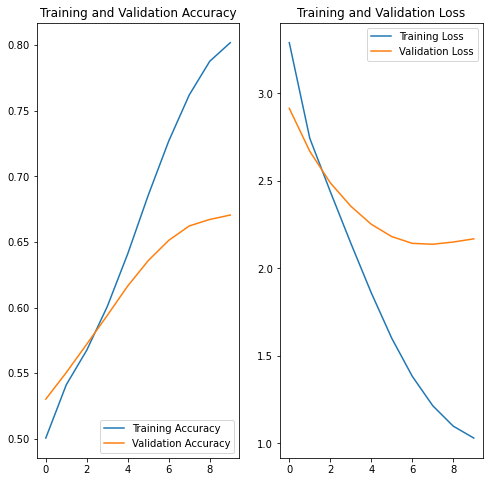

In [18]:
import matplotlib.pyplot as plt

acc = history_post.history['accuracy']
val_acc = history_post.history['val_accuracy']

loss=history_post.history['loss']
val_loss=history_post.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 7. post 모델로 가사 만들어보기

In [19]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=15):
    
    test_input = tokenizer.texts_to_sequences([init_sentence])  # 사전으로부터 init_sentence를 해석해 벡터로 변환
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)  # 벡터를 tensor로 변환
    end_token = tokenizer.word_index["<end>"]  # <end> 의 index를 저장해놓음

    
    while True:  # 참인 경우만 반복문
        predict = model(test_tensor)  # 입력받은 문장의 텐서를 입력 
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]  # 모델이 예측한 단어가 새롭게 생성한 단어가 됨  
        
        # 모델이 예측한 단어를 입력 문장 뒤에 붙여줌
        test_tensor = tf.concat([test_tensor, 
                                                                 tf.expand_dims(predict_word, axis=0)], axis=-1)
        
        if predict_word.numpy()[0] == end_token: break  # 모델이 <end> 를 예측하면 종료
        if test_tensor.shape[1] >= max_len: break  # 모델이 maxlen에 도달하면 종료

    generated = ""
  
    for word_index in test_tensor[0].numpy():  # 생성된 tensor안에 있는 word index를 
        generated += tokenizer.index_word[word_index] + " "  # tokenizer.index_word 사전을 통해 실제 단어로 하나씩 변환

    return generated  

generate_text(model_post, tokenizer, init_sentence="<start> i love", max_len=15)  # <start> i love 다음 어떤 문장이 올지 예측!

'<start> i love you , liberian girl <end> '

마이클 잭슨의 liberian girl의 곡이 나오다니 데이터에 기반한 것이 확실하다!

![마이클](https://user-images.githubusercontent.com/70703320/106150282-86e88d00-61be-11eb-8218-ed9576d4d16d.png)



## 8. pre 모델 설계
#### pre 모델 fitting

#### pre 모델의 데이터 하나 태워보기(model의 input shape 를 결정해주기 위해)

In [20]:
model_pre = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)  # model 설계

for enc_pre_train, dec_pre_train in dataset_pre.take(1): break  # dataset.take 하나를 불러와
model_pre(enc_pre_train)  # 태워봄으로써 shape를 맞춰줌

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[-2.0317241e-04, -2.5559606e-05, -4.7952338e-04, ...,
          2.1788914e-04,  3.9630988e-05, -2.5226977e-05],
        [-5.0932477e-04, -5.6573808e-05, -1.1287603e-03, ...,
          5.4695131e-04,  1.0200389e-04, -2.8908536e-05],
        [-8.5295032e-04, -8.1827849e-05, -1.7949137e-03, ...,
          9.2173007e-04,  1.7193821e-04,  1.4279407e-05],
        ...,
        [-2.3930548e-03, -9.1212214e-04, -4.4644714e-04, ...,
          2.3634520e-03,  3.1121477e-04,  1.6755589e-03],
        [-2.3162386e-03, -9.5846265e-04, -4.6283709e-05, ...,
          2.3083701e-03,  1.0119086e-04,  1.7188183e-03],
        [-1.9926617e-03, -6.0117466e-04,  4.9329805e-04, ...,
          1.9777031e-03, -9.8706230e-05,  2.0043598e-03]],

       [[-2.0317241e-04, -2.5559606e-05, -4.7952338e-04, ...,
          2.1788914e-04,  3.9630988e-05, -2.5226977e-05],
        [-5.0932477e-04, -5.6573808e-05, -1.1287603e-03, ...,
          5.4695131e-04, 

#### pre 모델 설계

In [21]:
model_pre.summary()  

Model: "text_generator_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  6144512   
_________________________________________________________________
lstm_2 (LSTM)                multiple                  20979712  
_________________________________________________________________
lstm_3 (LSTM)                multiple                  33562624  
_________________________________________________________________
dense_1 (Dense)              multiple                  24590049  
Total params: 85,276,897
Trainable params: 85,276,897
Non-trainable params: 0
_________________________________________________________________


#### pre 모델 fitting

In [23]:
# validation 할 pre dataset 구성
dataset_pre_val = tf.data.Dataset.from_tensor_slices((enc_pre_val, dec_pre_val)).shuffle(BUFFER_SIZE_pre)
dataset_pre_val = dataset_pre_val.batch(BATCH_SIZE_pre, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam()  # otimizer 구성

loss = tf.keras.losses.SparseCategoricalCrossentropy(  # loss 구성
    from_logits=True, reduction='none')

# check 포인트 만들기
checkpoint_dir = os.getenv('HOME')+'/aiffel/lyricist/models/post_skip'
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

model_pre.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])  # model compile
history_pre = model_pre.fit(dataset_pre, epochs=10,  # model fitting
                            validation_data=dataset_pre_val,
                            callbacks=[cp_callback])  

Epoch 1/10
488/488 [==============================] - ETA: 0s - loss: 1.7863 - accuracy: 0.6167
Epoch 00001: val_loss improved from inf to 2.36719, saving model to /home/aiffel-dj63/aiffel/lyricist/models/post_skip
488/488 [==============================] - 238s 488ms/step - loss: 1.7863 - accuracy: 0.6167 - val_loss: 2.3672 - val_accuracy: 0.5746
Epoch 2/10
488/488 [==============================] - ETA: 0s - loss: 1.5996 - accuracy: 0.6472
Epoch 00002: val_loss improved from 2.36719 to 2.36517, saving model to /home/aiffel-dj63/aiffel/lyricist/models/post_skip
488/488 [==============================] - 237s 485ms/step - loss: 1.5996 - accuracy: 0.6472 - val_loss: 2.3652 - val_accuracy: 0.5861
Epoch 3/10
488/488 [==============================] - ETA: 0s - loss: 1.4663 - accuracy: 0.6726
Epoch 00003: val_loss improved from 2.36517 to 2.35540, saving model to /home/aiffel-dj63/aiffel/lyricist/models/post_skip
488/488 [==============================] - 231s 474ms/step - loss: 1.4663 - a

## 시각화

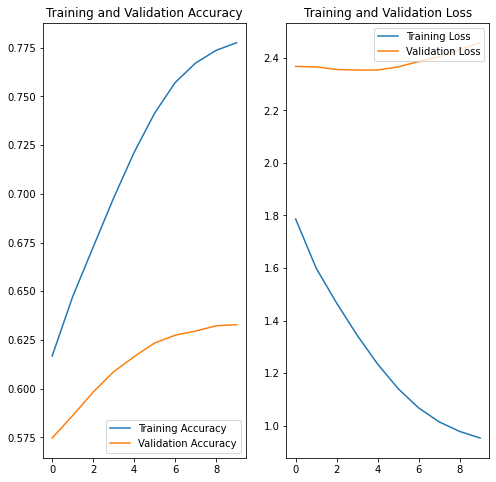

In [24]:
import matplotlib.pyplot as plt

acc = history_pre.history['accuracy']
val_acc = history_pre.history['val_accuracy']

loss=history_pre.history['loss']
val_loss=history_pre.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 9. pre 모델로 가사 만들어보기

In [25]:
generate_text(model_pre, tokenizer, init_sentence="<start> i love", max_len=15)  # <start> i love 다음 어떤 문장이 올지 예측!

'<start> i love you , i love you , can t you see ? <end> '

### 분석

post모델과 pre모델 둘 다 돌려본 결과 이번 프로젝트에서는 post모델의 loss가 pre모델의 loss보다 낮게 나왔다. (post모델은 validation loss가 최저일 때가 2.1382, pre모델은 validation loss가 최저일 때가 2.3533) 

=> 직관적으로 해석해보았다. 이번의 RNN의 문제 해결방식은 Many to Many이다.
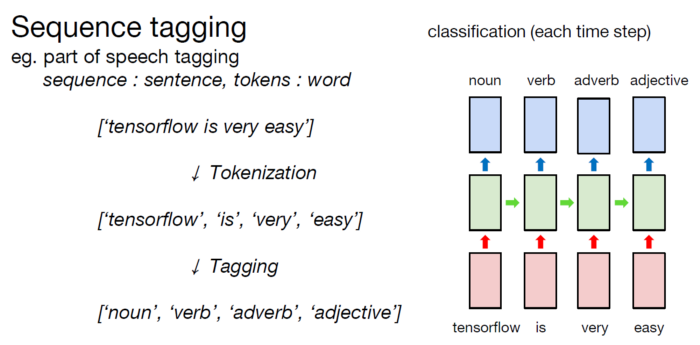
[출처](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture10.pdf) <br/>
Pre 방식은 앞에서부터 패딩을 하므로 앞에서부터 0을 넣게 되어 중요한 정보가 뒤에 밀리게 될 것이다. <br/>
Post 방식은 뒤에서부터 패딩을 하므로 뒤에서부터 0을 넣게 되어 중요한 정보가 앞으로 밀리게 될 것이다. <br/> <br/>
우리는 주어진 세 토큰(\<start\> i love)을 토대로 그 문장을 이어나가려고 한다. 이때, 앞에 중요한 정보가 더 많아야 문장을 자연스럽게 이어나갈 수 있을 것이다. 따라서, Post방식을 이용해야 Loss가 더 낮게 나올 수 있을 것을 직관적으로 이해할 수 있다.


### 회고

하이퍼 파라미터의 조절 <br/> <br/>
    
embedding_size (워드 벡터의 차원수, 단어가 추상적으로 표현되는 크기) = 512 <br/>
: 처음에 256 값을 대입하였더니 loss값이 크게 나왔다. 워드벡터가 12000으로 7000보다 커졌으므로 256보다는 큰 512를 설정해주기로 하였다. 

<br/>

hidden_size (hidden state의 차원수, 결정을 내리는 수의 크기) = 2048 <br/>
: 처음에 1024 값을 대입하였더니 loss값이 크게 나왔다. 이 부분도 마찬가지로 워드벡터가 12000으로 7000보다 커졌으므로 1024보다는 큰 2048를 설정해주기로 하였다. 



### 루브릭
1. 텍스트 제너레이션 결과가 그럴듯한 문장으로 생성되는가?
- post 모델: '\<start> i love you , liberian girl <end\> '
- pre 모델: '\<start> i love you , i love you , can t you see ? <end\> '

2. 특수문자 제거, 토크나이저 생성, 패딩처리 등의 과정이 빠짐없이 진행되었는가?
- 특수문자 제거: 2. 정규표현식으로 지워주기에서 제거해주었다.
- 토크나이저 생성: 3. 데이터 정제 토큰화를 진행해주었다.
- 패딩처리: 3. 데이터 정제 토큰화를 과정에서 post모델과 pre모델 둘 다 진행해주었다.

3. 텍스트 생성모델의 validation loss가 2.2 이하로 낮아졌는가?
- post모델: validation loss가 최저일 때가 2.1382이었다.
- pre모델: validation loss가 최저일 때가 2.3533이었다.